**KIDNEY** **DISEASE** **PREDICTION**

Collect DATA & Get information:


            I'm not a medical student ,so i first browse to know about kidney disease symptoms and major cause. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('kidney_disease.csv')

In [3]:
df.info

<bound method DataFrame.info of       id   age    bp     sg   al   su  ...   dm cad appet   pe  ane  classification
0      0  48.0  80.0  1.020  1.0  0.0  ...  yes  no  good   no   no             ckd
1      1   7.0  50.0  1.020  4.0  0.0  ...   no  no  good   no   no             ckd
2      2  62.0  80.0  1.010  2.0  3.0  ...  yes  no  poor   no  yes             ckd
3      3  48.0  70.0  1.005  4.0  0.0  ...   no  no  poor  yes  yes             ckd
4      4  51.0  80.0  1.010  2.0  0.0  ...   no  no  good   no   no             ckd
..   ...   ...   ...    ...  ...  ...  ...  ...  ..   ...  ...  ...             ...
395  395  55.0  80.0  1.020  0.0  0.0  ...   no  no  good   no   no          notckd
396  396  42.0  70.0  1.025  0.0  0.0  ...   no  no  good   no   no          notckd
397  397  12.0  80.0  1.020  0.0  0.0  ...   no  no  good   no   no          notckd
398  398  17.0  60.0  1.025  0.0  0.0  ...   no  no  good   no   no          notckd
399  399  58.0  80.0  1.025  0.0  0.0  ...  

In [4]:
df.describe

<bound method NDFrame.describe of       id   age    bp     sg   al   su  ...   dm cad appet   pe  ane  classification
0      0  48.0  80.0  1.020  1.0  0.0  ...  yes  no  good   no   no             ckd
1      1   7.0  50.0  1.020  4.0  0.0  ...   no  no  good   no   no             ckd
2      2  62.0  80.0  1.010  2.0  3.0  ...  yes  no  poor   no  yes             ckd
3      3  48.0  70.0  1.005  4.0  0.0  ...   no  no  poor  yes  yes             ckd
4      4  51.0  80.0  1.010  2.0  0.0  ...   no  no  good   no   no             ckd
..   ...   ...   ...    ...  ...  ...  ...  ...  ..   ...  ...  ...             ...
395  395  55.0  80.0  1.020  0.0  0.0  ...   no  no  good   no   no          notckd
396  396  42.0  70.0  1.025  0.0  0.0  ...   no  no  good   no   no          notckd
397  397  12.0  80.0  1.020  0.0  0.0  ...   no  no  good   no   no          notckd
398  398  17.0  60.0  1.025  0.0  0.0  ...   no  no  good   no   no          notckd
399  399  58.0  80.0  1.025  0.0  0.0  ...

In [5]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
df.skew(axis=0,skipna=True)

id       0.000000
age     -0.668259
bp       1.605429
sg      -0.172444
al       0.998157
su       2.464262
bgr      2.010773
bu       2.634374
sc       7.509538
sod     -6.996569
pot     11.582956
hemo    -0.335095
dtype: float64

In [7]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
df.drop('id',axis=1,inplace=True)

Data already contain Id index and again index occurs so i drop "id"

In [9]:
df=df.dropna()

lot of null values found.so i dropped it

In [10]:
df.shape

(158, 25)

In [11]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [12]:
df['pcv']=df['pcv'].astype(int)
df['wc']=df['wc'].astype(int)
df['rc']=df['rc'].astype(float)

pvc,wc,rc are numeric term but it stored in strings so i changed str to int 

In [13]:
df.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [14]:
df.classification=[1 if each =='ckd' else 0 for each in df.classification]

In [15]:
num_feature=df.select_dtypes(include=[np.number])

In [16]:
cat_feature=df.select_dtypes(exclude=[np.number])

In [17]:
dictionary={ 'rbc' :{'normal':0, 'abnormal':1},
            'pc' :{'abnormal':0 ,'normal':1},
            'pcc' :{'present':0 ,'notpresent':1},
            'ba' :{'notpresent':0 ,'present':1},
            'htn' :{'yes':0 ,'no':1},
            'dm' :{'no':0, 'yes':1},
            'cad':{'no':0 ,'yes':1},
            'appet' :{'poor':0,'good':1},
            'pe' :{'yes':0, 'no':1},
            'ane' :{'yes':0, 'no':1}
            }

Encode the data


In [18]:
df=df.replace(dictionary)

In [19]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,0,0,0,0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,0,0,0,0,0,0,1
9,53.0,90.0,1.020,2.0,0.0,1,0,0,0,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,0,1,0,0,1,0,1
11,63.0,70.0,1.010,3.0,0.0,1,0,0,0,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8,0,1,0,0,0,1,1
14,68.0,80.0,1.010,3.0,2.0,0,0,0,1,157.0,90.0,4.1,130.0,6.4,5.6,16,11000,2.6,0,1,1,0,0,1,1
20,61.0,80.0,1.015,2.0,0.0,1,0,1,0,173.0,148.0,3.9,135.0,5.2,7.7,24,9200,3.2,0,1,1,0,0,0,1


**DATA** **VISUALIZATION**:

In [20]:
corr=df.corr()

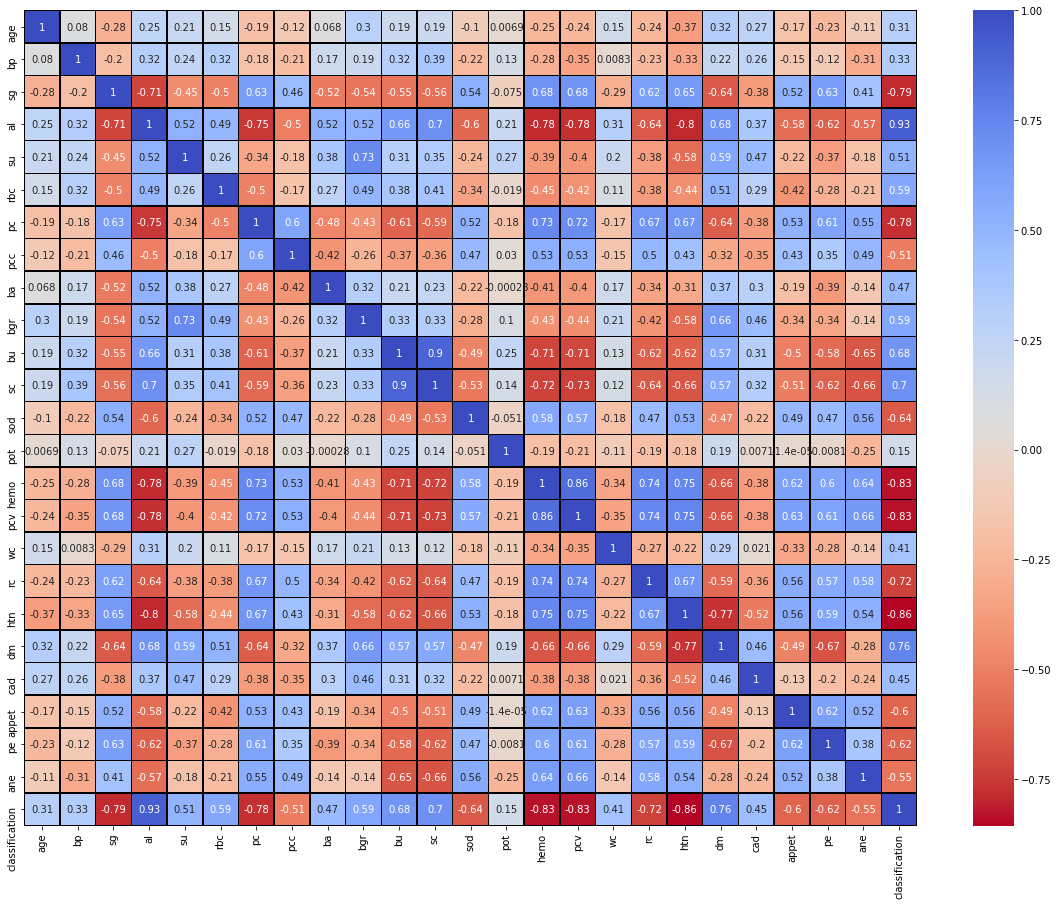

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm_r', fmt='.2g', linewidths=0.5, linecolor='black')
       

In [22]:
print(corr.classification.sort_values(ascending=False)[:])

classification    1.000000
al                0.925816
dm                0.758965
sc                0.702206
bu                0.677611
bgr               0.591217
rbc               0.586391
su                0.510615
ba                0.468845
cad               0.447355
wc                0.407570
bp                0.326567
age               0.305119
pot               0.153565
pcc              -0.509915
ane              -0.548947
appet            -0.604622
pe               -0.622573
sod              -0.640902
rc               -0.719978
pc               -0.775388
sg               -0.790102
pcv              -0.827983
hemo             -0.833790
htn              -0.856334
Name: classification, dtype: float64


al is highly co-related to classification.

**Feature** **Selection**:

In [24]:
y=df["classification"].values
x_data=df.drop(["classification"],axis=1)

[0.00030316 0.01076596 0.08001692 0.16317883 0.00982258 0.03064744
 0.11740805 0.01682616 0.01011412 0.01355472 0.02325106 0.03279303
 0.0034188  0.00087962 0.05665913 0.06425698 0.00814164 0.01853331
 0.16408969 0.10378997 0.00412068 0.02585729 0.02117047 0.02040038]


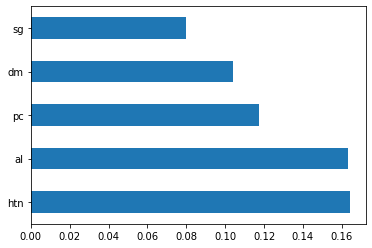

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x_data,y)


print(model.feature_importances_)


#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_data.columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()

**Feature scaling:**

In [33]:
#Normalization
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))


**TRAIN** **MODEL**:

In [34]:
#these variables will be used to show the algorithm name and its successes.
score=[]
algorithms=[]

In [35]:
#Preparing the test and training set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [36]:
x_test.shape

(48, 24)

In [37]:
y_test.shape

(48,)

In [38]:
# for model selection
score:[]
algorithms:[]

KNN accuracy = 0.9583333333333334


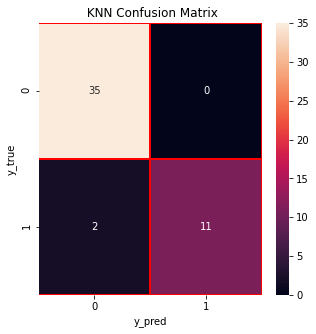

In [39]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

#model and accuracy
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.predict(x_test)
score.append(knn.score(x_test,y_test)*100)
algorithms.append("KNN")
print("KNN accuracy =",knn.score(x_test,y_test))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred1=knn.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred1)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title(" KNN Confusion Matrix")
plt.show()


Random Forest accuracy = 1.0


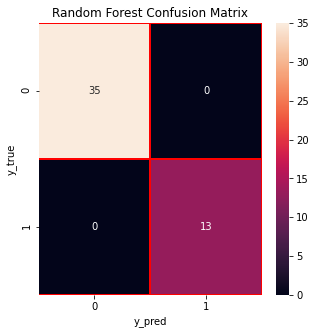

In [40]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)
score.append(rf.score(x_test,y_test)*100)
algorithms.append("Random Forest")
print("Random Forest accuracy =",rf.score(x_test,y_test))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred2=rf.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred2)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest Confusion Matrix")
plt.show()

logistic regression accuracy = 0.9583333333333334


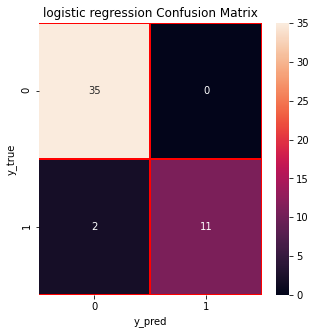

In [41]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
score.append(lr.score(x_test,y_test)*100)
algorithms.append("logistic regression")
print("logistic regression accuracy =",lr.score(x_test,y_test))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred3=lr.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred3)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("logistic regression Confusion Matrix")
plt.show()

Decisiontree accuracy = 0.9791666666666666


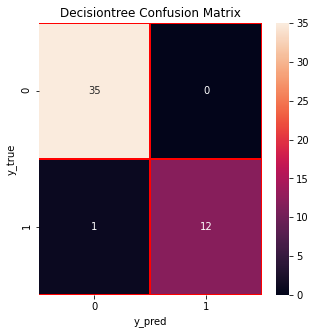

In [42]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
lr=DecisionTreeClassifier()
lr.fit(x_train,y_train)
score.append(lr.score(x_test,y_test)*100)
algorithms.append("Decisiontree")
print("Decisiontree accuracy =",lr.score(x_test,y_test))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred4=lr.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred4)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decisiontree Confusion Matrix")
plt.show()

Text(0.5, 1.0, 'Algorithm vs Score')

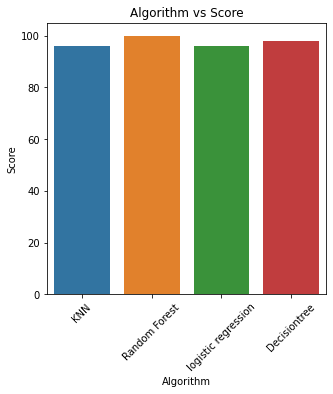

In [43]:
#visualization of best model
plt.figure(figsize=(5,5))
sns.barplot(x=algorithms,y=score)
plt.xticks(rotation=45)
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Algorithm vs Score')

Random Forest Classifier is the best Model for this DataFrame


               In confusion matrix:
                         False positive = 0
                         False Negative = 0

In [44]:
# actual vs predict

dictionary=({'Actual':y_test,'Predict':y_pred2})
pd.DataFrame.from_dict(dictionary)

,Actual,Predict
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
5,1,1
6,0,0
7,1,1
8,1,1
9,0,0


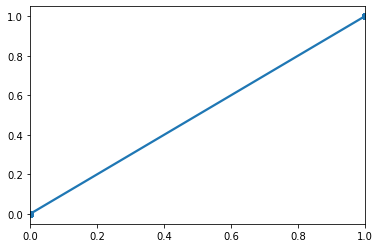

In [47]:
sns.regplot(y_test,y_pred2)

In [48]:
#dump in pickllbe
import pickle 

file=open('Kidney_disease_predicton_model.pkl','wb')

pickle.dump(rf,file)